In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # 1. Draw the map of India and use a bubble map to show the populations of all the state capital of India.

In [ ]:
pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
state_capitals = ['Agartala', 'Aizawl', 'Bengaluru', 'Bhopal', 'Bhubaneswar', 'Chandigarh', 'Chennai', 'Daman', 'Dehradun', 'Dispur', 'Gandhinagar', 'Gangtok', 'Hyderabad', 'Imphal', 'Itanagar', 'Jaipur', 'Kohima', 'Kolkata', 'Lucknow', 'Mumbai', 'New Delhi', 'Panaji', 'Patna', 'Pondicherry', 'Port Blair', 'Raipur', 'Ranchi', 'Shillong', 'Shimla', 'Srinagar']

NOTE: We can fetch the location details by using geocoder as well.

In [ ]:
# latitudes=[]
# longitudes=[]
# for i in range(len(state_capitals)):
#   g = geocoder.osm(state_capitals[i])
#   latitude, longitude = g.latlng
#   print(f"Latitude: {latitude}, Longitude: {longitude}")
#   latitudes.append(latitude)
#   longitudes.append(longitude)

In [ ]:
populations=[399688, 291822, 8443675, 2368145, 837737, 1149985, 7088000, 191173, 578420, 193986, 1387478, 98400, 10126654, 264986, 59490, 3073350, 310577, 14974070, 3040115, 12442373, 32187000, 114759, 2856127, 227411, 127562, 1010087, 1096138, 143229, 171817, 119012]
latitudes=[23.8315, 23.7367, 12.9716, 23.2599, 20.2961, 30.7333, 13.0827, 20.4283, 30.3165, 26.1433, 23.2156, 27.3314, 17.3850, 24.8170, 27.0975, 26.9124, 25.6751, 22.5726, 26.8467, 19.0760, 28.7041, 15.4909, 25.5941, 11.9139, 11.6234, 21.2787, 23.3434, 25.5788, 31.1048, 34.0837]
longitudes=[91.2868, 92.7176, 77.5946, 77.4126, 85.8245, 76.7794, 80.2707, 72.8397, 78.0322, 91.7908, 72.6369, 88.6138, 78.4867, 93.9368, 93.6170, 75.7873, 94.1086, 88.3639, 80.9462, 72.8777, 77.1025, 73.8278, 85.1568, 79.8090, 92.7265, 85.8338, 85.8462, 77.1734, 74.6821, 74.7973]

In [ ]:
!pip install geopandas
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


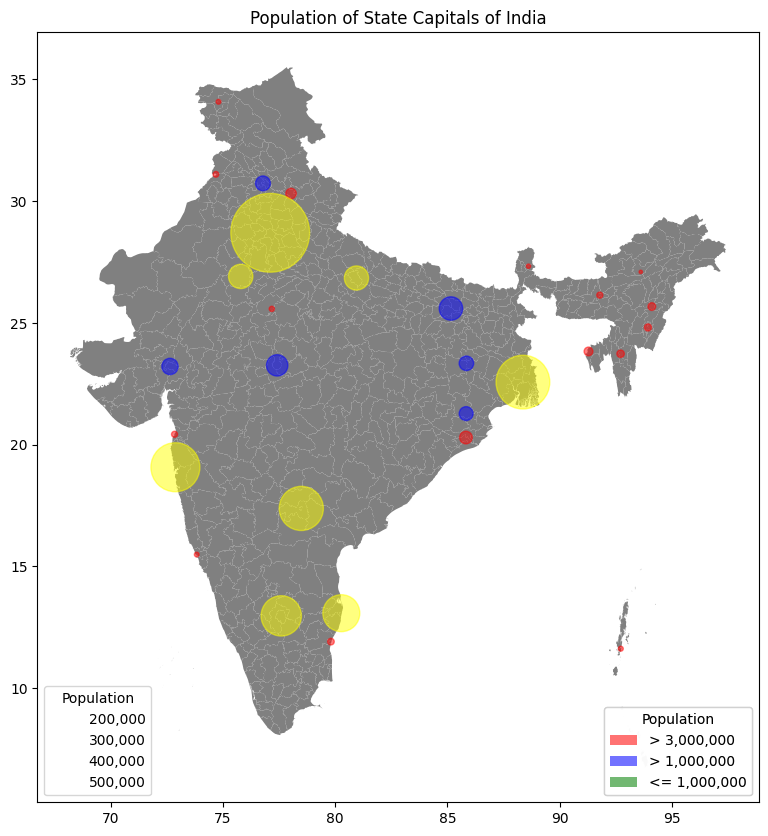

In [ ]:
# create a list of colors based on the population
colors = ['yellow' if pop > 3000000 else 'blue' if pop > 1000000 else 'red' for pop in populations]

# create a list of sizes based on the population
sizes = [pop/10000 for pop in populations]

# create a list of points based on the latitude and longitude
points = [Point(long, lat) for lat, long in zip(latitudes, longitudes)]

# create a GeoDataFrame from the lists
data = {'city': state_capitals, 'population': populations, 'geometry': points}
gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# create the map
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set(title='Population of State Capitals of India')

# add the map of India
india = gpd.read_file('/content/drive/MyDrive/semester 6/Data Visualisation/lab3/IND_adm2.shp')
india.plot(ax=ax, color='gray')

# plot the bubble map
gdf.plot(ax=ax, color=colors, markersize=sizes, alpha=0.5)

# add a legend for size and color
sizes_legend = ax.legend(handles=[plt.Circle((0,0), 1, color='white', linewidth=0, alpha=0.5, label='{}00,000'.format(size)) for size in range(2, 6)],
                         title='Population', loc='lower left')
colors_legend = ax.legend(handles=[plt.Circle((0,0), 1, color=color, linewidth=0, alpha=0.5, label=label) for color, label in [('red', '> 3,000,000'), ('blue', '> 1,000,000'), ('green', '<= 1,000,000')]],
                          title='Population', loc='lower right')

# add both legends to the plot
ax.add_artist(sizes_legend)
ax.add_artist(colors_legend)

plt.show()


# 2. Draw the connection graph of Go Air domestic flights of India from the database https://www.flygofirst.com/umbraco/surface/Schedule/Flightscheduledata

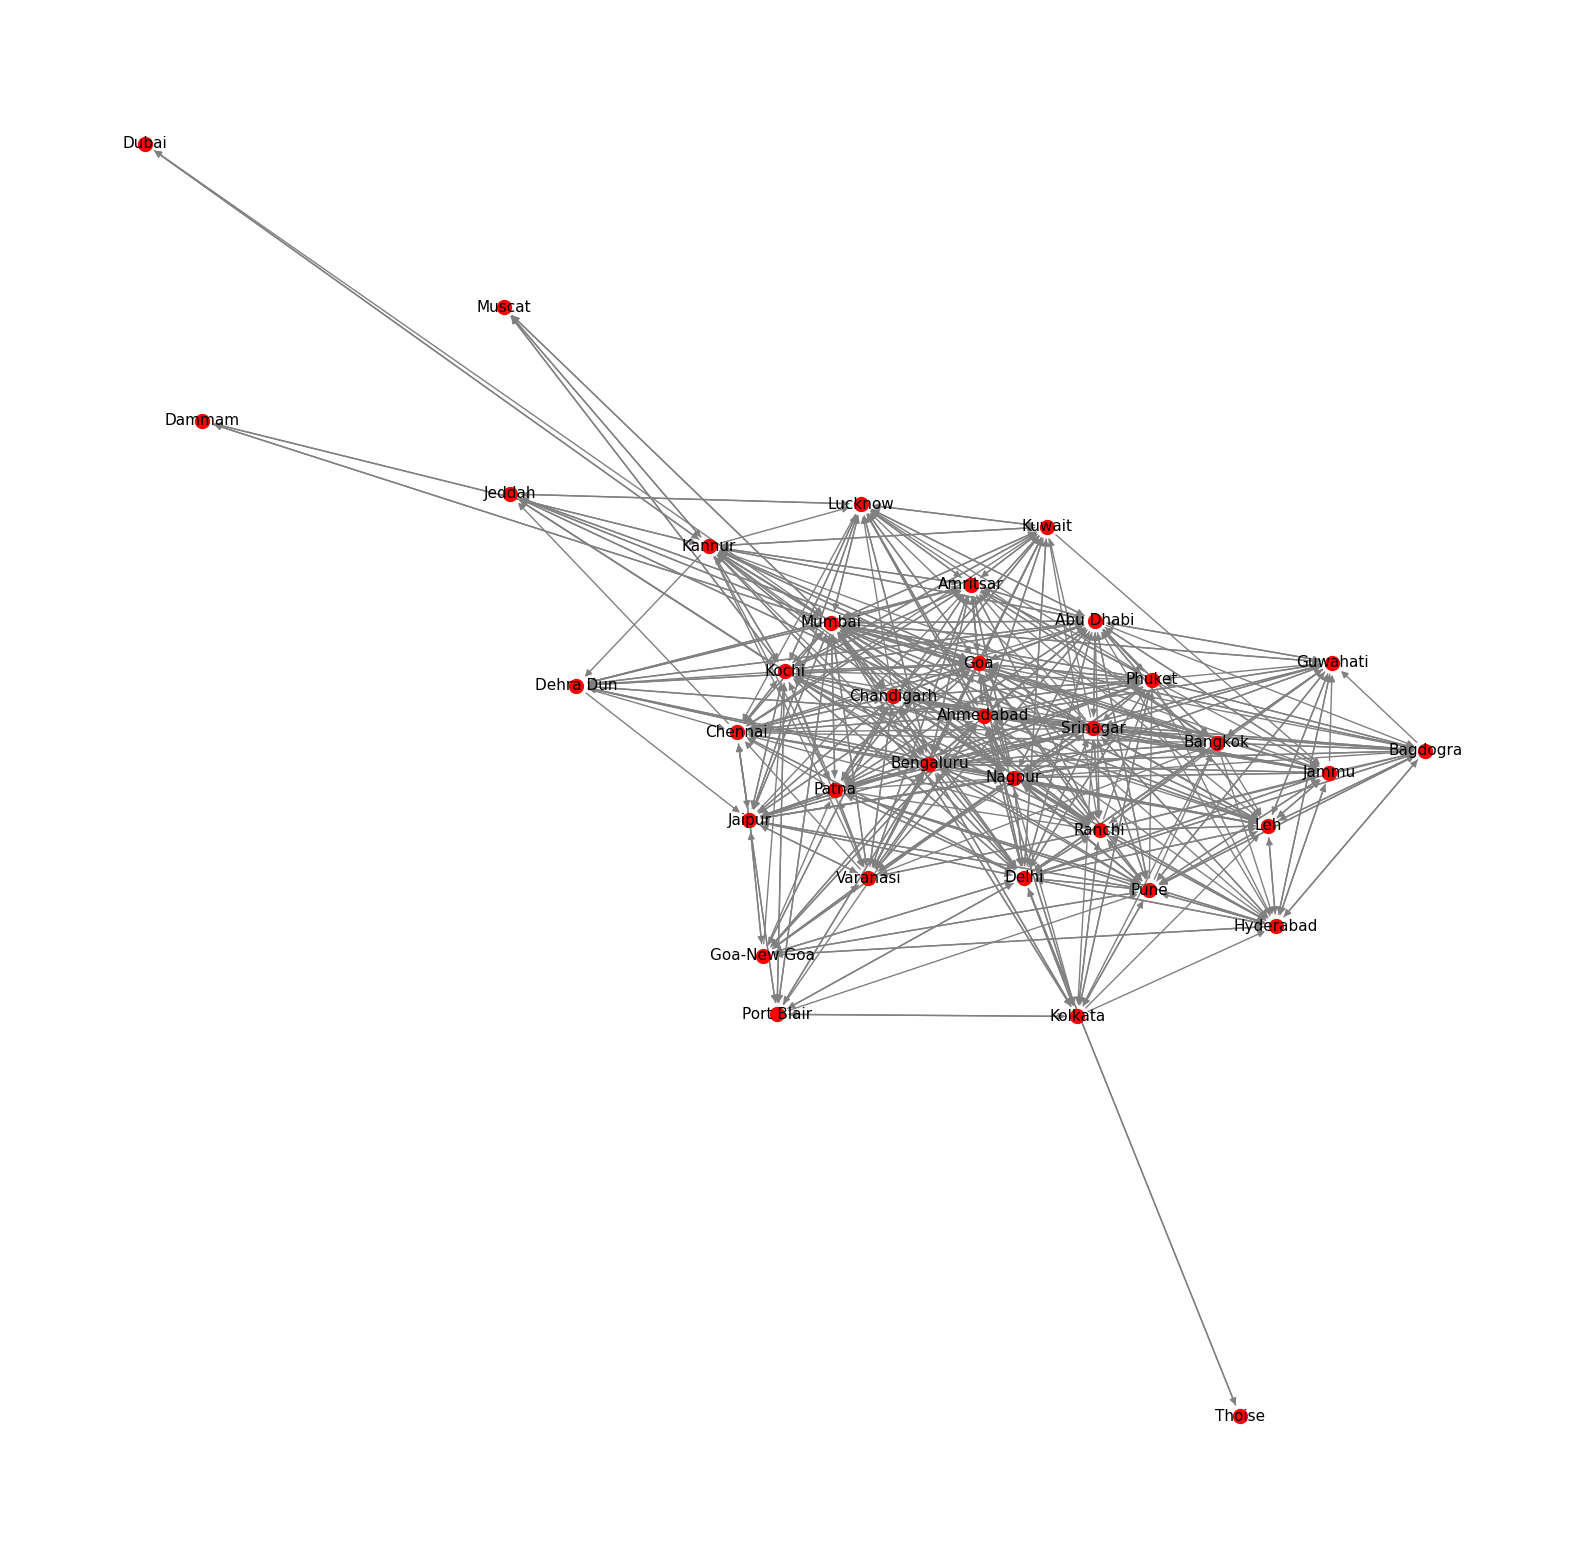

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/semester 6/Data Visualisation/lab3/Flightschedule.csv')

# Create a directed graph
G = nx.DiGraph()
# Add edges to the graph
for i, row in df.iterrows():
    origin = row['Origin']
    dest = row['Destination']
    G.add_edge(origin, dest)

# Draw the graph
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(20, 20)) # set the figure size
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='red')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=11 ,font_family='sans-serif')

plt.axis('off')
plt.show()


In [ ]:
# read the csv file
df = pd.read_csv('/content/drive/MyDrive/semester 6/Data Visualisation/lab3/Flightschedule.csv')

# extract unique country names from both "origin" and "destination" columns
airports = pd.concat([df['Origin'], df['Destination']]).unique()
airports =airports.tolist()



NOTE: We can fetch the location details by using geocoder as well.


In [ ]:

# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="MyApp")
# airport_lats= []
# airport_longs = []

# for i in airports:
#     location = geolocator.geocode(i)
#     airport_lats.append(location.latitude)
#     airport_longs.append(location.longitude)



In [ ]:
print(airports)

['Abu Dhabi', 'Ahmedabad', 'Amritsar', 'Bagdogra', 'Bangkok', 'Bengaluru', 'Chandigarh', 'Chennai', 'Dammam', 'Dehra Dun', 'Delhi', 'Dubai', 'Goa', 'Goa-New Goa', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jammu', 'Jeddah', 'Kannur', 'Kochi', 'Kolkata', 'Kuwait', 'Leh', 'Lucknow', 'Mumbai', 'Muscat', 'Nagpur', 'Patna', 'Phuket', 'Port Blair', 'Pune', 'Ranchi', 'Srinagar', 'Thoise', 'Varanasi']


In [ ]:
airport_lats = [24.4539, 23.0777, 31.7055, 26.6812, 13.7563, 12.9716, 30.7333, 13.0827, 26.3927, 30.3256, 28.7041, 25.2048, 15.2993, 15.3825, 26.1131, 17.385, 26.9124, 32.7266, 21.4858, 11.8745, 9.9312, 22.5726, 29.0588, 33.7782, 26.847, 19.076, 23.5859, 21.1458, 25.4358, 8.5586, 11.7401, 11.9416, 18.3438, 30.7333, 34.0837, 25.3356, 25.3176]
airport_lons = [54.3773, 72.5797, 74.7973, 88.3283, 100.5018, 77.5946, 76.7794, 80.2707, 49.9777, 78.0437, 77.1025, 55.2708, 74.124, 73.8416, 91.2868, 78.4867, 75.7939, 74.857, 39.2192, 75.333, 76.2673, 88.3639, 47.9774, 76.5762, 80.9462, 72.8777, 55.2038, 55.4088, 82.6692, 85.1354, 75.9568, 85.124, 73.0485, 74.7973, 74.531, 97.2514, 83.024]


In [ ]:
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


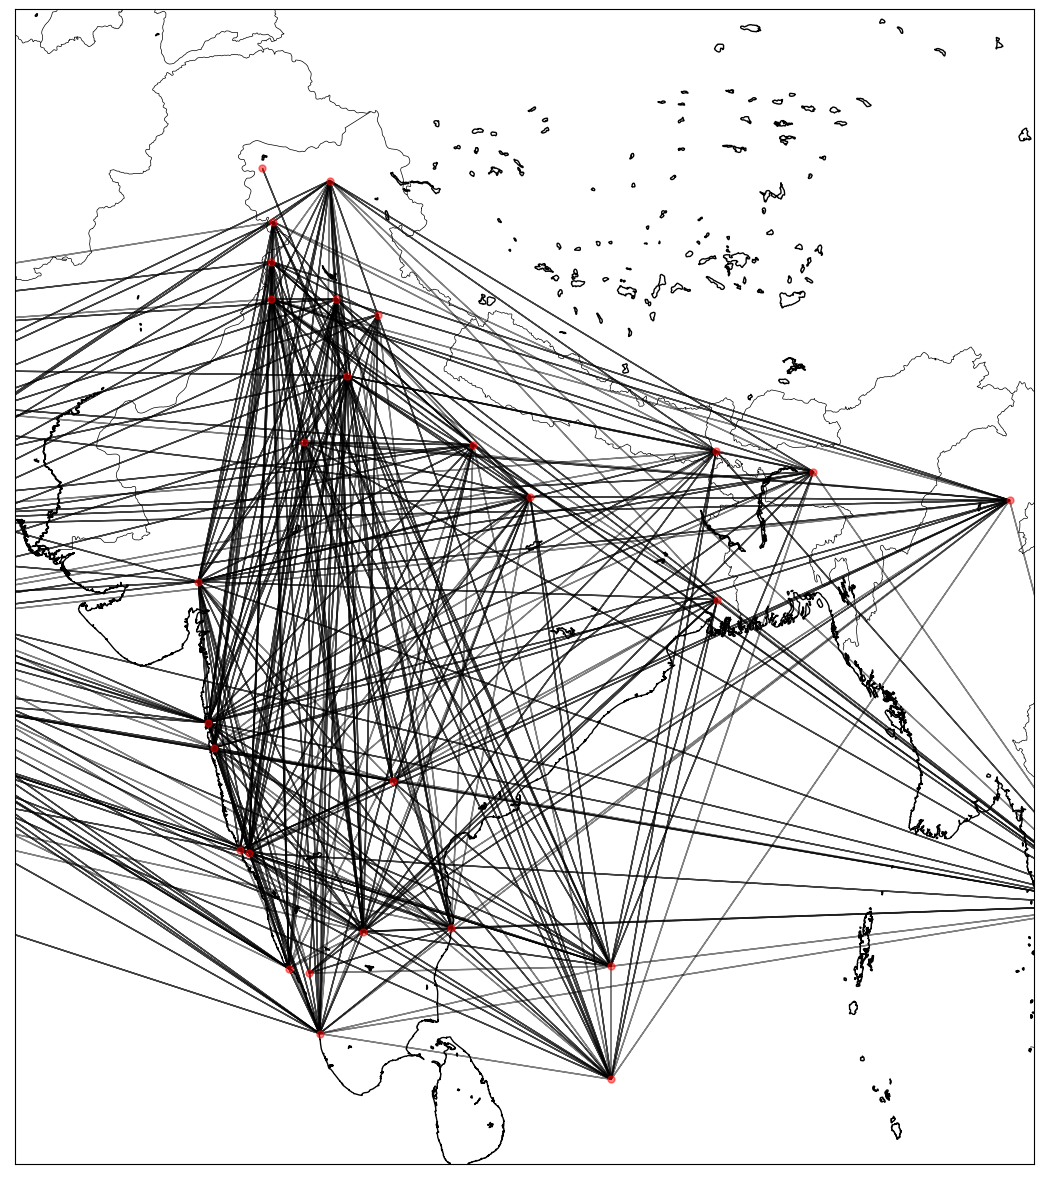

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Read the CSV file containing flight connections
df = pd.read_csv('/content/drive/MyDrive/semester 6/Data Visualisation/lab3/Flightschedule.csv')

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges to the graph from the CSV data
for i, row in df.iterrows():
    G.add_edge(row['Origin'], row['Destination'])

plt.figure(figsize=(15, 15))
# Create a basemap of India
m = Basemap(
    projection='merc',
    llcrnrlat=6,
    llcrnrlon=67,
    urcrnrlat=38,
    urcrnrlon=98,
    lat_ts=0,
    resolution='h'
)

# Draw the coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Draw the nodes (airports) on the map
for i in range(len(airports)):
    lon, lat = airport_lons[i], airport_lats[i]
    x, y = m(lon, lat)
    plt.plot(x, y, 'ro', markersize=5, alpha=0.5)

# Draw the edges (connections) on the map
for origin, dest in G.edges():
    o_lon, o_lat = airport_lons[airports.index(origin)], airport_lats[airports.index(origin)]
    d_lon, d_lat = airport_lons[airports.index(dest)], airport_lats[airports.index(dest)]
    o_x, o_y = m(o_lon, o_lat)
    d_x, d_y = m(d_lon, d_lat)
    plt.arrow(o_x, o_y, d_x - o_x, d_y - o_y, alpha=0.5, head_width=100, head_length=100, fc='k', ec='k', length_includes_head=True)

# Show the map

plt.show()
